In [2]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("../data/data_processed/erp_sales_cleaned.csv")

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Check
df.head()


,order_id,customer_id,product_id,store_id,region,sales_channel,order_date,quantity,unit_price,discount,net_sales
0,1000,C0103,P040,S02,West,Offline,2023-01-01,2,210,0.05,399.0
1,1001,C0180,P049,S02,East,Online,2023-01-02,2,976,0.00,1952.0
2,1002,C0093,P044,S02,West,Online,2023-01-03,1,1977,0.10,1779.3
3,1003,C0015,P019,S02,North,Offline,2023-01-04,1,1166,0.15,991.1
4,1004,C0107,P042,S02,East,Offline,2023-01-05,3,310,0.15,790.5


In [3]:
# Aggregate daily sales
daily_sales = df.groupby('order_date')['net_sales'].sum().reset_index()
daily_sales.rename(columns={'order_date': 'ds', 'net_sales': 'y'}, inplace=True)


In [4]:
model = Prophet()
model.fit(daily_sales)


16:51:19 - cmdstanpy - INFO - Chain [1] start processing
16:51:20 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\akash\AppData\Local\Temp\ipykernel_14304\3532532037.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


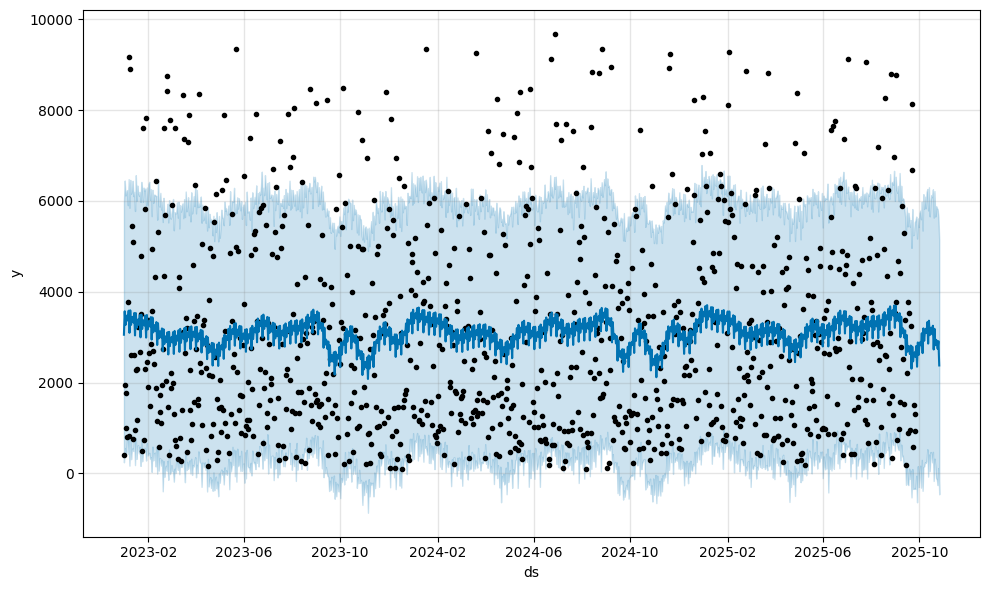

In [5]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
fig.show()
